# Visualizing the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

In [2]:
data = np.loadtxt('data/ex2data1.txt', delimiter=',')
x = data[:, 0:2]
y = data[:, 2]
y

array([ 0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,
        1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
        1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

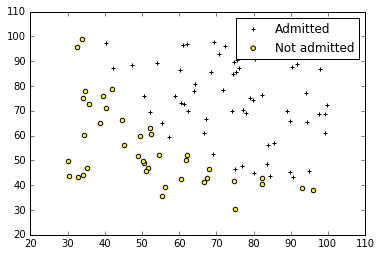

In [3]:
pos = y==1
neg = y==0
ad = plt.scatter(x[pos, 0], x[pos,1], c='black', marker='+')
nad = plt.scatter(x[neg, 0], x[neg,1], c='yellow', marker='o')
plt.legend((ad, nad), ('Admitted', 'Not admitted'), scatterpoints=1, loc=0)

# Implementation

### Logistic regression:

\begin{align}
y_i|x_i, \theta \sim \operatorname{Bern}(h(x_i\theta))\\
h(x) = \frac{1}{1+e^{-x}}
\end{align}

#### Sigmoid function

\begin{equation}
h(x) = \frac{1}{1+e^{-x}}
\end{equation}

In [4]:
#sigmoid function
def sigm(x):
    return(1/(1+np.exp(-x)))

#### Cost function

\begin{equation}
J(\theta)=\frac{1}{m}\big((\log(X\theta))^T y+(\log(\boldsymbol{1}-h(X\theta)))^T(\boldsymbol{1}-y)\big)
\end{equation}

#### Gradient function

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m}X^T\big(h(X\theta)-y\big)
\end{equation}

In [5]:
#cost function
def costFunction(theta, X, y):
    m = len(y)
    hx = sigm(np.dot(X, theta))
    J = 1/m*(-np.dot(y, np.log(hx))-np.dot((1-y),np.log(1-hx)))
    #path for log 0
    if np.isnan(J):
        return(np.inf)
    return(J)

In [6]:
def gradient(theta, X, y):
    m = len(y)
    hx = sigm(np.dot(X, theta))
    grad = 1/m*np.dot(X.T, hx-y)
    return(grad.flatten())

In [7]:
m = len(y)
X = np.column_stack((np.ones(m), x))
p = X.shape[1]
initial_theta = np.zeros(p)

In [8]:
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)

In [9]:
print('Cost at initial theta (zerors):', cost)
print('Gradient at initial theta (zeros):', grad)


Cost at initial theta (zerors): 0.69314718056
Gradient at initial theta (zeros): [ -0.1        -12.00921659 -11.26284221]


#### Learning parameters

In [10]:
res = minimize(costFunction, initial_theta, args=(X,y), method = None, jac=gradient, options={'maxiter':400})
res

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in log


      fun: 0.2034977015894407
 hess_inv: array([[  3.24739469e+03,  -2.59380769e+01,  -2.63469561e+01],
       [ -2.59380769e+01,   2.21449124e-01,   1.97772068e-01],
       [ -2.63469561e+01,   1.97772068e-01,   2.29018831e-01]])
      jac: array([ -2.73305488e-10,   1.43144016e-07,  -1.58965813e-07])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 23
     njev: 28
   status: 0
  success: True
        x: array([-25.16133401,   0.20623172,   0.2014716 ])